# Employee Performance Analysis

#### This analysis explores employee performance to identify key patterns and relationships within the workforce. The objective is to generate actionable insights that can support better workforce planning and management such as understanding how factors like education, age, and job level influence salary levels and tenure.

## Importing Libraries and Loading the Dataset

#### The first step is to import key Python libraries for data analysis and visualization:

#### 1. Pandas for handling and analyzing structured data.

#### 2. Numpy for numerical operations.

#### 3. Matplotlib and seaborn for visualizations.

#### After importing, The dataset was uploaded using "pd.read_excel()" and displayed the first ten rows using "df.head()". 

In [1]:
import pandas as pd
# Load all sheets
employees = pd.read_excel("Employee Performance Dataset_C30_English.xlsx", sheet_name="employees")
stores = pd.read_excel("Employee Performance Dataset_C30_English.xlsx", sheet_name="stores")
monthly_performance = pd.read_excel("Employee Performance Dataset_C30_English.xlsx", sheet_name="monthly_performance")
role_kpis = pd.read_excel("Employee Performance Dataset_C30_English.xlsx", sheet_name="role_kpis")
business_outcomes = pd.read_excel("Employee Performance Dataset_C30_English.xlsx", sheet_name="business_outcomes")


# Basic Structure and Summary



In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The employees sheet
employees = pd.read_excel("Employee Performance Dataset_C30_English.xlsx", sheet_name="employees")

# View the first 10 rows
employees.head(10)

,Employee_Id,Full_Name,Age,Education_Level,Hire_Date,Exit_Date,Department,Job_Role,Job_Level,Employment_Type,Base_Salary_Annual,Store_Location,Store_Location_Latitude,Store_Location_Longitude,Store_Id,Manager_Id,Manager_Name,Manager_Status
0,EMP000001,Marie Kim DDS,23,Master's,26/04/2021,13/04/2022,Store Operations,Cashier,Entry,Full-time,25745.40,Charlotte,35.2271,-80.8431,STR058,EMP001131,Michelle Walls,Executive
1,EMP000002,Danny Morgan,26,Master's,03/09/2021,NaN,Store Operations,Sales Associate,Associate,Full-time,39408.57,San Jose,37.3382,-121.8863,STR137,EMP002456,Jennifer Moore,Executive
2,EMP000003,Crystal Robinson,38,Bachelor's,25/08/2016,NaN,Store Operations,Cashier,Entry,Full-time,29319.94,Jacksonville,30.3322,-81.6557,STR008,EMP000529,Melissa Bishop,Senior Manager
3,EMP000004,Mark Perez,33,Bachelor's,10/12/2021,NaN,Store Operations,Senior Sales Associate,Senior_Associate,Full-time,43979.88,Las Vegas,36.1699,-115.1398,STR063,EMP001305,Tina Walter,Senior Manager
4,EMP000005,Shannon Jones,24,High School,24/02/2018,NaN,Store Operations,Cashier,Entry,Full-time,23560.19,Chicago,41.8781,-87.6298,STR109,EMP001823,Nicholas Fitzgerald,Senior Manager
5,EMP000006,Michael Lewis,36,Bachelor's,03/03/2019,NaN,Store Operations,Sales Associate,Associate,Part-time,17923.16,Detroit,42.3314,-83.0458,STR120,EMP002436,Miranda Murray,Senior Manager
6,EMP000007,Timothy Duncan,45,Bachelor's,15/11/2021,NaN,Store Operations,Sales Associate,Associate,Full-time,28697.00,New York,40.7128,-74.0060,STR048,EMP002585,Kara Rogers,Senior Manager
7,EMP000008,Richard Aguirre,27,High School,26/01/2019,04/04/2021,Store Operations,Cashier,Entry,Full-time,30661.76,Phoenix,33.4484,-112.0740,STR144,EMP002684,David James,Senior Manager
8,EMP000009,Brent Jordan,36,Some College,26/01/2021,02/10/2024,Store Operations,Sales Associate,Associate,Full-time,35213.38,New York,40.7128,-74.0060,STR034,EMP002712,Scott Meza,Senior Manager
9,EMP000010,John Daniel,37,Master's,25/06/2019,NaN,Store Operations,Sales Associate,Associate,Full-time,36496.87,New York,40.7128,-74.0060,STR140,EMP000053,Rebecca Valencia,Manager


# Data Quality Checks


#### The " df.isnull().sum()" code was used to identify duplicate entries and missing values across all columns. The results showed that four columns contained missing values: "Exit_Date," "Manager_Id," "Manager_Name," and "Manager_Status." Specifically, "Exit_Date" had a large number of missing entries (6009), which was expected because not all employees had left the organization.


In [3]:
monthly_performance.isnull().sum()  

Employee_Id              0
Year_Month               0
Performance_Rating       0
Training_Hours           0
Overtime_Hours           0
Absenteeism_Days         0
Promotion_Flag           0
Salary_Increase_Flag     0
Monthly_Bonus            0
Benefits_Cost            0
Employee_Satisfaction    0
Engagement_Index         0
Manager_Evaluation       0
dtype: int64

In [4]:
stores.isnull().sum()

Store_Id          0
Store_Name        0
City              0
City_Latitude     0
City_Longitude    0
Store_Type        0
Opening_Date      0
dtype: int64

In [5]:
business_outcomes.isnull().sum()


Store_Id                 0
Department               0
Year_Month               0
Sales_Target             0
Sales_Actual             0
Customer_Satisfaction    0
Nps_Score                0
Waste_Percentage         0
On_Time_Delivery         0
dtype: int64

In [6]:
role_kpis.isnull().sum()


Employee_Id           0
Year_Month            0
Kpi_1_Value           0
Kpi_1_Name            0
Kpi_2_Value           0
Kpi_2_Name            0
Kpi_3_Value           0
Kpi_3_Name            0
Productivity_Index    0
dtype: int64

In [7]:
employees.isnull().sum()    

Employee_Id                    0
Full_Name                      0
Age                            0
Education_Level                0
Hire_Date                      0
Exit_Date                   6009
Department                     0
Job_Role                       0
Job_Level                      0
Employment_Type                0
Base_Salary_Annual             0
Store_Location                 0
Store_Location_Latitude        0
Store_Location_Longitude       0
Store_Id                       0
Manager_Id                     5
Manager_Name                   5
Manager_Status                 5
dtype: int64

# Employment Duration 

#### I created a new column called "Employment_Duration_Days" to determine how long each employee stayed with the company

In [8]:
employees['Hire_Date'] = pd.to_datetime(employees['Hire_Date'], errors='coerce')
employees['Exit_Date'] = pd.to_datetime(employees['Exit_Date'], errors='coerce')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11424\2863822160.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  employees['Hire_Date'] = pd.to_datetime(employees['Hire_Date'], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11424\2863822160.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  employees['Exit_Date'] = pd.to_datetime(employees['Exit_Date'], errors='coerce')


In [9]:
employees['Employment_Duration_Days'] = (employees['Exit_Date'] - employees['Hire_Date']).dt.days
employees['Employment_Duration_Days'] = employees['Employment_Duration_Days'].astype('Int64')

print(employees[['Employee_Id', 'Full_Name', 'Hire_Date', 'Exit_Date', 'Employment_Duration_Days']].to_string())

top_10 = employees[['Employee_Id', 'Full_Name', 'Hire_Date', 'Exit_Date', 'Employment_Duration_Days']] \
            .sort_values(by='Employment_Duration_Days', ascending=False) \
            .head(10)

print(top_10.to_string())


     Employee_Id                  Full_Name  Hire_Date  Exit_Date  Employment_Duration_Days
0      EMP000001              Marie Kim DDS 2021-04-26 2022-04-13                       352
1      EMP000002               Danny Morgan 2021-09-03        NaT                      <NA>
2      EMP000003           Crystal Robinson 2016-08-25        NaT                      <NA>
3      EMP000004                 Mark Perez 2021-12-10        NaT                      <NA>
4      EMP000005              Shannon Jones 2018-02-24        NaT                      <NA>
5      EMP000006              Michael Lewis 2019-03-03        NaT                      <NA>
6      EMP000007             Timothy Duncan 2021-11-15        NaT                      <NA>
7      EMP000008            Richard Aguirre 2019-01-26 2021-04-04                       799
8      EMP000009               Brent Jordan 2021-01-26 2024-10-02                      1345
9      EMP000010                John Daniel 2019-06-25        NaT               

# Categorical Summary


#### I reviewed the distribution of categorical variables such as department, job level, and education level. This helped me understand the composition of the workforce

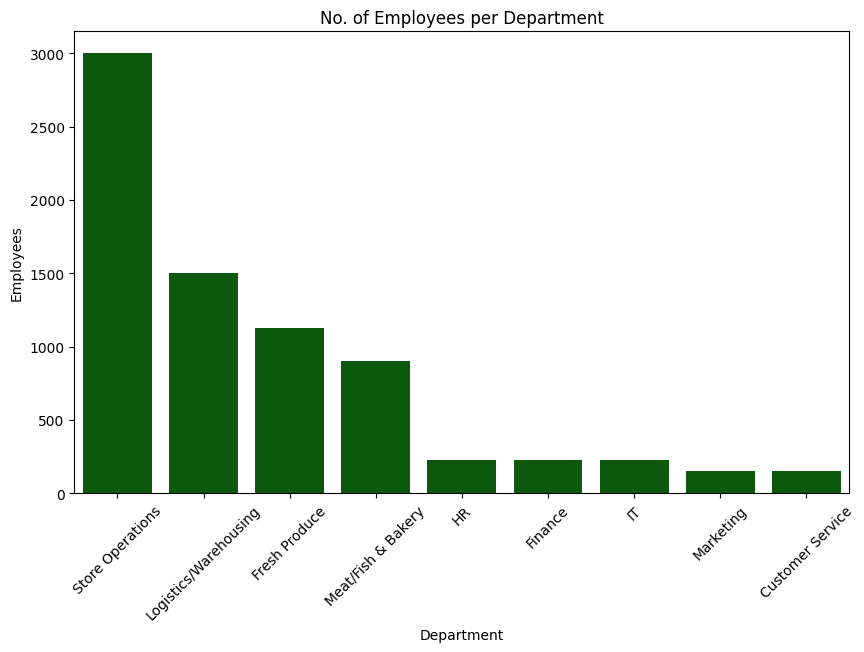

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of employees per department
employees['Department'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.countplot(
    data=employees, 
    x='Department', 
    order=employees['Department'].value_counts().index, 
    color='darkgreen'
)
plt.xticks(rotation=45)
plt.title('No. of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Employees')
plt.show()


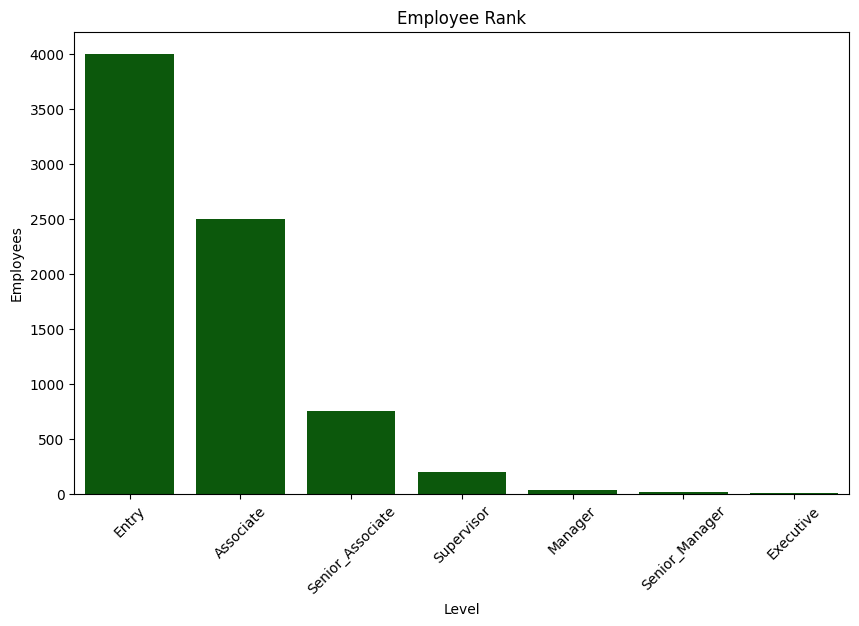

In [11]:
# Count of employees per job level
employees['Job_Level'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.countplot(
    data=employees, 
    x='Job_Level', 
    order=employees['Job_Level'].value_counts().index, 
    color='darkgreen'
)
plt.xticks(rotation=45)
plt.title('Employee Rank')
plt.xlabel('Level')
plt.ylabel('Employees')
plt.show()


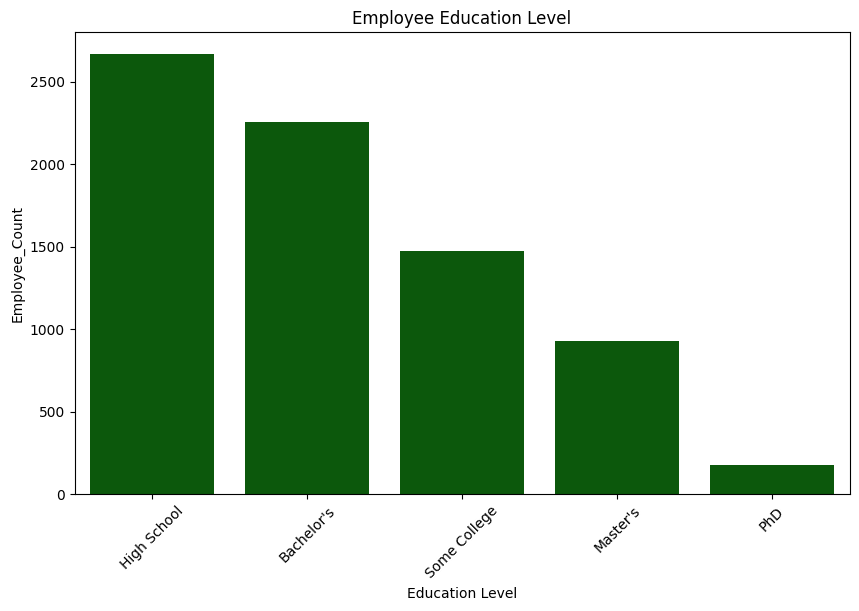

In [12]:
employees['Education_Level'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=employees, x = 'Education_Level', order = employees['Education_Level'].value_counts().index, color= 'darkgreen')
plt.xticks(rotation=45)
plt.title('Employee Education Level')
plt.xlabel('Education Level')
plt.ylabel('Employee_Count')
plt.show()


# Age Distribution of Employee

#### I visualized the age distribution of the workforce to understand its population structure. The mean age is 32.5 years, and the median age is 32.0 years.

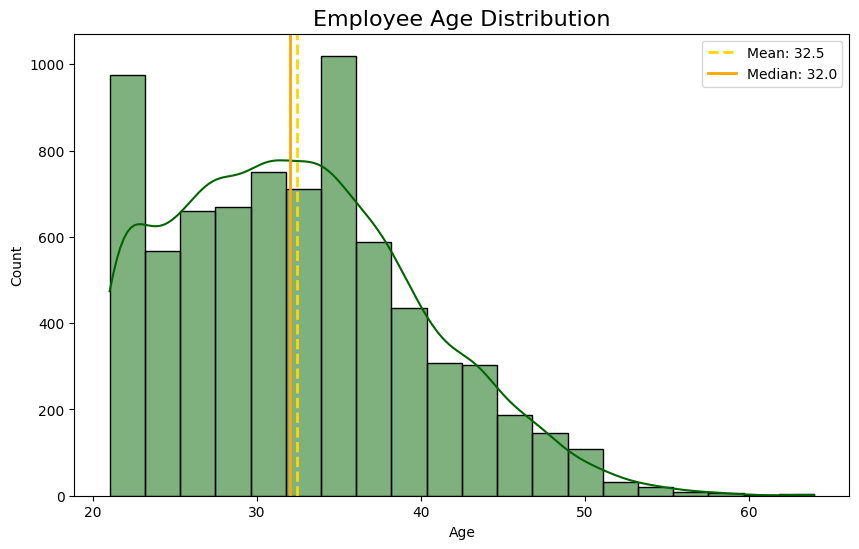

In [13]:

plt.figure(figsize=(10,6))

# Histogram with KDE
sns.histplot(employees['Age'], bins=20, kde=True, color='darkgreen')

# Calculate mean and median
mean_age = employees['Age'].mean()
median_age = employees['Age'].median()

# Add vertical lines with contrasting colors
plt.axvline(mean_age, color='gold', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='orange', linestyle='-', linewidth=2, label=f'Median: {median_age:.1f}')

# Titles and labels
plt.title('Employee Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


# Employee Salary Analysis


#### The salary distribution shows that most employees earn between 20,000 & 40,000 USD annually, with a large concentration around the mid 20,000 to 30,000 USD range. A smaller number of employees earn between 40,000 to 60,000 USD and only very few fall above 70,000 USD. Overall, the company’s salary structure is heavily clustered at the lower and mid-entry job levels.

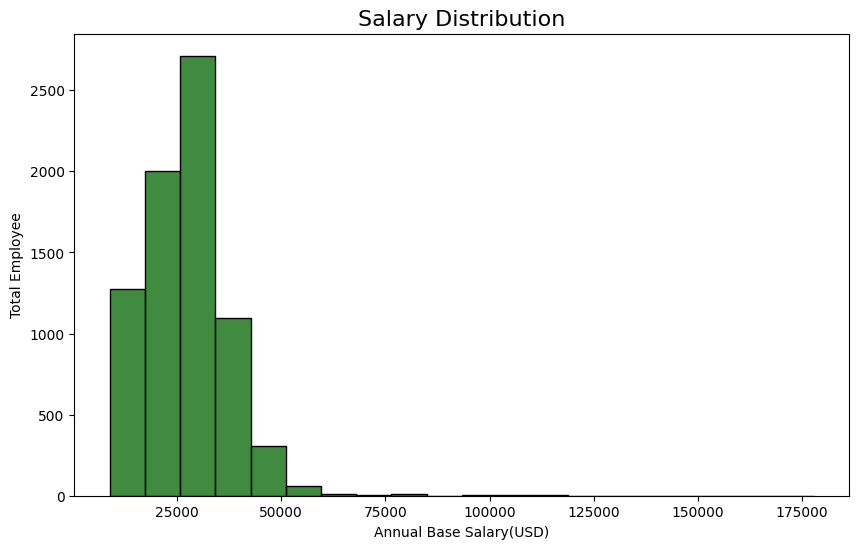

In [14]:
plt.figure(figsize=(10,6))

# Histogram with KDE
sns.histplot(employees['Base_Salary_Annual'], bins=20, color='darkgreen')

# Titles and labels
plt.title('Salary Distribution', fontsize=16)
plt.xlabel('Annual Base Salary(USD)')
plt.ylabel('Total Employee')
plt.show()


# Salary By Job Level


#### The salary distribution shows an upward progression from entry-level through Executive roles. Entry and Associate staff mostly earn between 20,000 & 40,000 USD, while Manager and Senior Manager level staff earn between 60,000 & 115,000 USD. Executive salaries earn as high as 175,000 USD per annum.

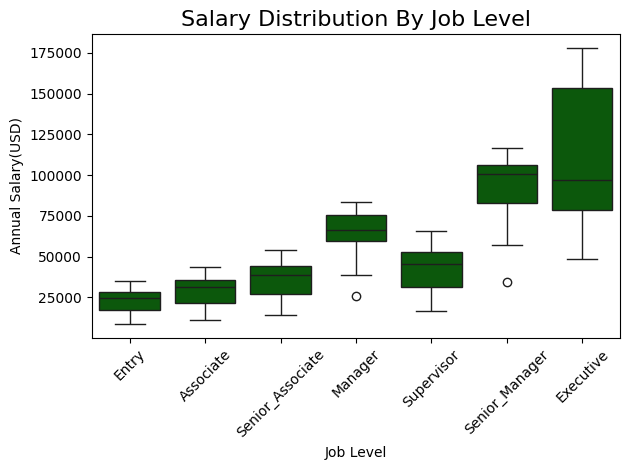

In [15]:
plt.figure(figure=(10,6))
sns.boxplot(x= 'Job_Level', y= 'Base_Salary_Annual', data=employees, color= 'darkgreen')
plt.title('Salary Distribution By Job Level', fontsize=16)
plt.xlabel('Job Level')
plt.ylabel('Annual Salary(USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Employee Retention Summary


#### The analysis shows that 80% of the workforce still work in the company, while 20% have exited. This indicates a strong retention rate, suggesting that the organization has been able to maintain a stable workforce over the observed period.

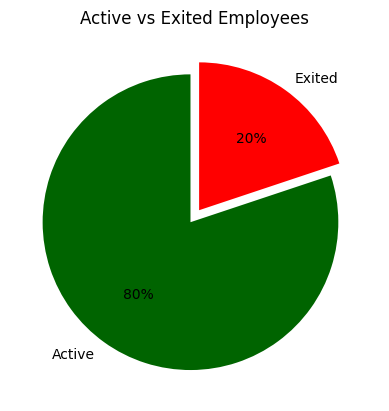

In [16]:
# Create Employment_Status column
employees['Employment_Status'] = employees['Exit_Date'].apply(lambda x: 'Active' if pd.isna(x) else 'Exited')

# Pie chart
employees['Employment_Status'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    startangle=90,
    colors=['darkgreen', 'red'],
    explode=[0.05, 0.05],
    
)

plt.title('Active vs Exited Employees')
plt.ylabel('')
plt.show()


#### The workforce has an average tenure of 5 years, with most employees working between 4 and 6 years. A small percentage of the workforce has been with the company for 10 years or more, indicating a mix of mid-tenure employees with a few long-serving staff.

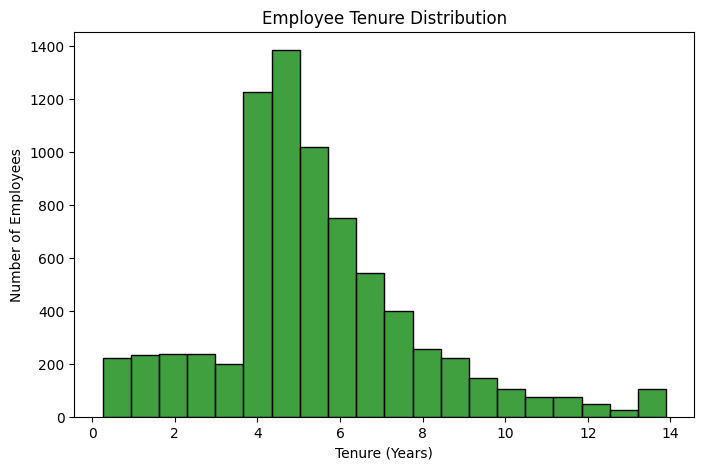

In [17]:
# Calculate tenure in years
employees['Tenure_Years'] = ((employees['Exit_Date'].fillna(pd.Timestamp('today')) - employees['Hire_Date']).dt.days / 365).round(2)

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(employees['Tenure_Years'], bins=20, color='green')
plt.title("Employee Tenure Distribution")
plt.xlabel("Tenure (Years)")
plt.ylabel("Number of Employees")
plt.show()


#### Majority of employees who earned between 10,000 & 30,000 USD worked for 1–4 years, whereas those who earned above 40,000 USD typically stayed for more than 4 years, indicating that higher salaries were generally associated with longer employment duration.

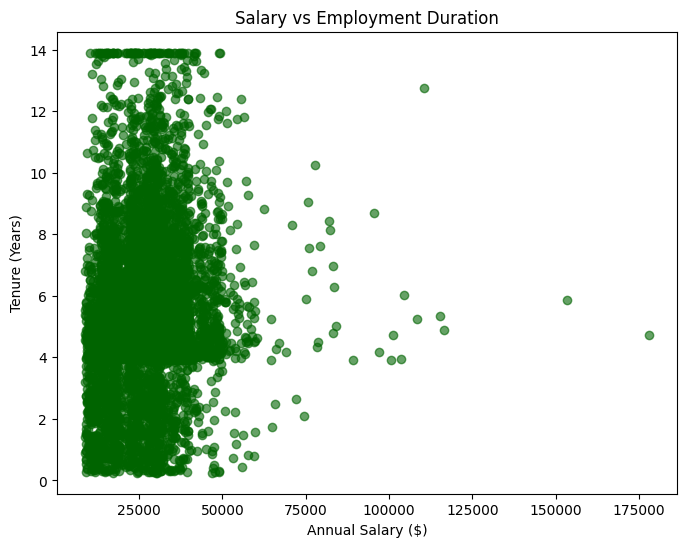

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(employees['Base_Salary_Annual'], employees['Tenure_Years'], color='darkgreen', alpha=0.6)
plt.title('Salary vs Employment Duration')
plt.xlabel('Annual Salary ($)')
plt.ylabel('Tenure (Years)')
plt.show()


# Employee Distribution and Average Salary by Store Location



#### The table below shows that most stores have a workforce of 310 to 330 employees with an average salary of 27,000 USD indicating consistency in staffing and pay across the companies stores. 

In [19]:
from tabulate import tabulate

# Group by store location
store_summary = employees.groupby('Store_Location').agg(
    Total_Employees=('Employee_Id', 'count'),
    Average_Salary=('Base_Salary_Annual', 'mean')
).reset_index()

# Round the average salary to whole numbers
store_summary['Average_Salary'] = store_summary['Average_Salary'].round(0).astype(int)

# Sort by Total Employees (optional)
store_summary = store_summary.sort_values(by='Total_Employees', ascending=False)

# Reset index for sequential numbering
store_summary.reset_index(drop=True, inplace=True)

# Display as a clean table with numbering
print(tabulate(store_summary, headers='keys', tablefmt='grid', showindex=True))


+----+------------------+-------------------+------------------+
|    | Store_Location   |   Total_Employees |   Average_Salary |
+====+==================+===================+==================+
|  0 | Fort Worth       |               330 |            27211 |
+----+------------------+-------------------+------------------+
|  1 | Nashville        |               329 |            27816 |
+----+------------------+-------------------+------------------+
|  2 | San Jose         |               325 |            26457 |
+----+------------------+-------------------+------------------+
|  3 | Louisville       |               323 |            27513 |
+----+------------------+-------------------+------------------+
|  4 | Seattle          |               319 |            27479 |
+----+------------------+-------------------+------------------+
|  5 | Denver           |               316 |            26863 |
+----+------------------+-------------------+------------------+
|  6 | Los Angeles      |

# Store Analysis

#### The chart below shows that Regular stores are the most common, followed by Superstores, with Express stores being the least prevalent. This suggests a primary focus on standard retail outlets, with limited smaller-format locations.

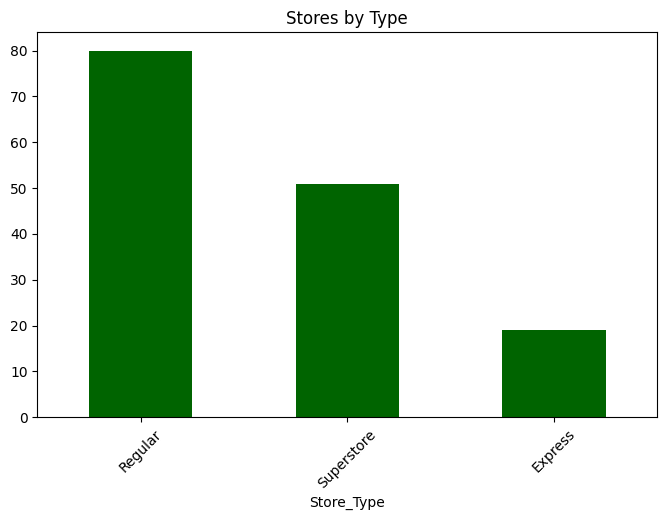

In [20]:
stores['Store_Type'].value_counts().plot(kind='bar', figsize=(8,5), color= 'darkgreen')
plt.title('Stores by Type')
plt.xticks(rotation=45)
plt.show()


#### Store openings rose steadily from 2015, reaching a peak in 2017 before declining in 2018–2019. Activity picked up again after 2020 but remained volatile, ultimately ending with a significant decline in 2024.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11424\1133342773.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stores['Opening_Date'] = pd.to_datetime(stores['Opening_Date'])


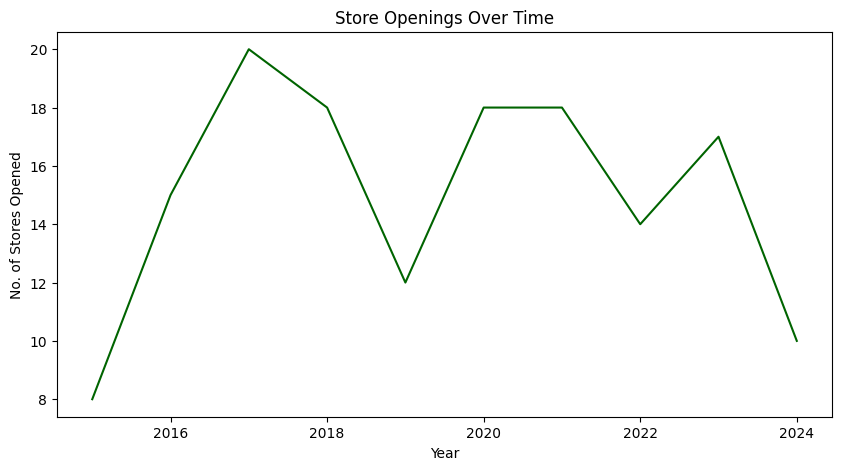

In [21]:
stores['Opening_Date'] = pd.to_datetime(stores['Opening_Date'])
stores['Year'] = stores['Opening_Date'].dt.year

stores.groupby('Year')['Store_Id'].count().plot(kind='line', figsize=(10,5), color= 'darkgreen')
plt.title('Store Openings Over Time')
plt.xlabel('Year')
plt.ylabel('No. of Stores Opened')
plt.show()


# Employee Performance Analysis




#### The scatter plot below illustrated a strong positive relationship between Employee Satisfaction and Engagement Index. As satisfaction increased, engagement levels consistently rose. Suggesting that employees who reported higher satisfaction were generally more engaged in their roles.

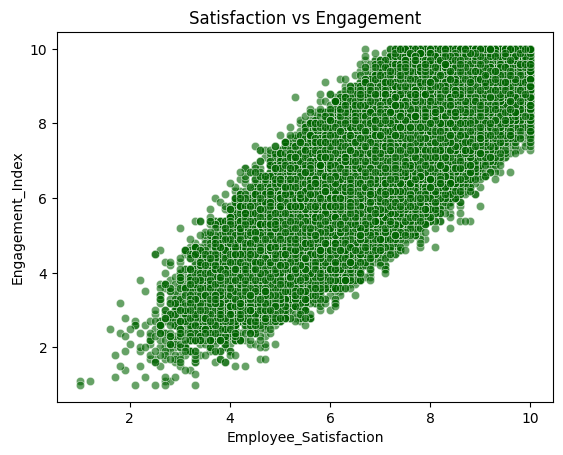

In [22]:
sns.scatterplot(data=monthly_performance, x='Employee_Satisfaction', y='Engagement_Index', color='darkgreen', alpha=0.6)
plt.title('Satisfaction vs Engagement')
plt.show()


#### Employee monthly productivity improved over YoY, with minor mid-year dips. Peaks are observed in the last quarter of each year, reaching a index of 2 in December 2024.

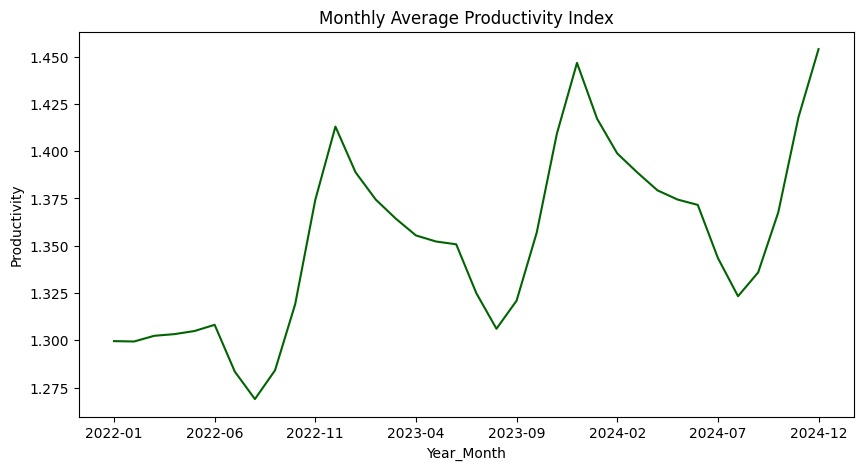

In [23]:
role_kpis.groupby("Year_Month")["Productivity_Index"].mean().plot(kind='line', figsize=(10,5), color= 'darkgreen')
plt.title("Monthly Average Productivity Index")
plt.ylabel("Productivity")
plt.show()


# Sales Analysis 


#### Analysis of store sales performance shows most stores achieved close to their targets, with average performance slightly above 100%. Several stores significantly over-performed, reaching up to 115%, while a few under-performed, dipping below 85%.

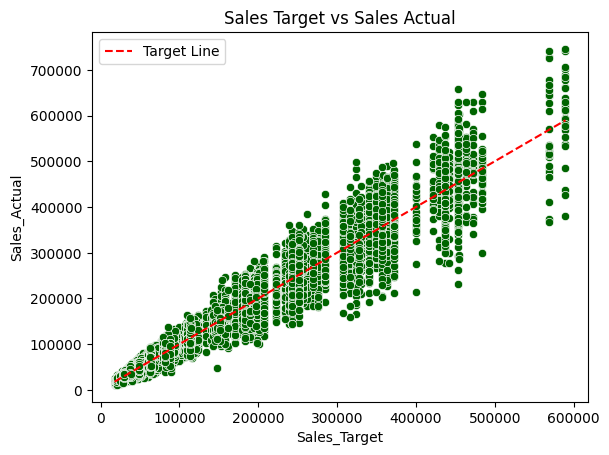

In [24]:
sns.scatterplot(data=business_outcomes, x='Sales_Target', y='Sales_Actual', color='darkgreen')
plt.plot([business_outcomes['Sales_Target'].min(), business_outcomes['Sales_Target'].max()],
         [business_outcomes['Sales_Target'].min(), business_outcomes['Sales_Target'].max()],
         color='red', linestyle='--', label='Target Line')
plt.title("Sales Target vs Sales Actual")
plt.legend()
plt.show()


#### The distribution of waste percentage showed a wide spread, with most stores reporting waste levels between 1% and 5%, with only a small number of stores experienced waste levels above 5%

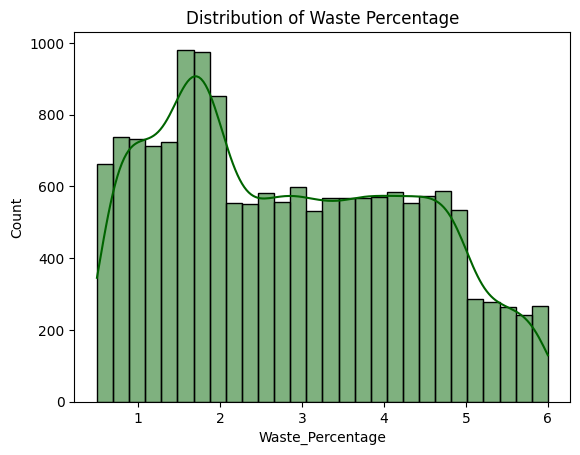

In [25]:
sns.histplot(business_outcomes["Waste_Percentage"], kde=True, color='darkgreen')
plt.title("Distribution of Waste Percentage")
plt.show()


#### The distribution shows that most stores consistently achieve high on-time delivery rates, with the majority of values clustering between 92% and 97%

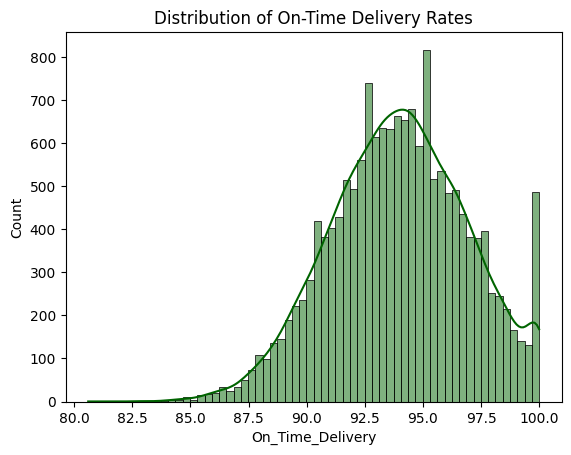

In [26]:
sns.histplot(business_outcomes["On_Time_Delivery"], kde=True, color='darkgreen')
plt.title("Distribution of On-Time Delivery Rates")
plt.show()
